In [0]:
import pandas as pd
import numpy as np

#get csv from url
df1 = pd.read_csv('black_friday_data_kaggle.csv', error_bad_lines=False)

In [2]:
df1.head()

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10.0,A,2,0.0,-1.0,NaN,NaN,8370.0
1,1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,2,1000001,P00087842,F,0-17,10.0,A,2,0.0,-1.0,NaN,NaN,1422.0
3,3,1000001,P00085442,F,0-17,10.0,A,2,0.0,-1.0,14.0,NaN,1057.0
4,4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


# Feature Engineering

In [0]:
# Transform data to have rows at a product id level
#group by product id . agg(user id is to give total number of users per product id)
df_product = df1.groupby(by='Product_ID', as_index=False).agg({'User_ID': pd.Series.nunique, 'Product_Category_1': lambda x: x.iloc[0]})
df_product_test = df1.groupby(by='Product_ID', as_index=False)#.agg({'User_ID': pd.Series.nunique, 'Product_Category_1': lambda x: x.iloc[0]})

#The log of total unique users
#df_product['Log_Num_Users'] = np.log(df_product.User_ID)


In [12]:
df_product.head()

,Product_ID,User_ID,Product_Category_1
0,P00000142,202,-1.0
1,P00000242,58,-1.0
2,P00000342,42,-1.0
3,P00000442,9,-1.0
4,P00000542,21,-1.0


In [10]:
df_product_test.head(5)

,Unnamed: 0,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1000001,P00069042,F,0-17,10.0,A,2,0.0,-1.0,NaN,NaN,8370.0
1,1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,2,1000001,P00087842,F,0-17,10.0,A,2,0.0,-1.0,NaN,NaN,1422.0
3,3,1000001,P00085442,F,0-17,10.0,A,2,0.0,-1.0,14.0,NaN,1057.0
4,4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
5,5,1000003,P00193542,M,26-35,15.0,A,3,0.0,1.0,2.0,NaN,15227.0
6,6,1000004,P00184942,M,46-50,7.0,B,2,1.0,1.0,8.0,17.0,19215.0
7,7,1000004,P00346142,M,46-50,7.0,B,2,1.0,1.0,15.0,NaN,15854.0
8,8,1000004,P0097242,M,46-50,7.0,B,2,1.0,1.0,16.0,NaN,15686.0
9,9,1000005,P00274942,M,26-35,20.0,A,1,1.0,8.0,NaN,NaN,7871.0


In [6]:
df_product.Product_Category_1.value_counts()

-1.0     1096
 5.0      595
 8.0      591
 1.0      309
 11.0     187
 2.0       99
 6.0       70
 3.0       65
 16.0      64
 4.0       63
 7.0       46
 15.0      31
 14.0      26
 13.0      19
 18.0      17
 12.0      15
 10.0       9
 17.0       8
 9.0        1
Name: Product_Category_1, dtype: int64

test data set has 1151 samples all other is training data

In [0]:
df_train = df_product[df_product.Product_Category_1 != -1]
df_test = df_product[df_product.Product_Category_1 == -1] # Not to be touched until the model is trained and ready

# Divide the training data into test and train data to measure accuracy
y = df_train['Product_Category_1']
X = df_train.drop('Product_Category_1', axis=1)


In [11]:
X.head()
X.count()
df_test.count()
#len(df_product)

Product_ID            1207
User_ID               1207
Product_Category_1    1207
Log_Num_Users         1207
dtype: int64

In [12]:
X.head()

,Product_ID,User_ID,Log_Num_Users
1207,P00130242,80,4.382027
1208,P00130342,35,3.555348
1209,P00130442,248,5.513429
1210,P00130542,12,2.484907
1211,P00130642,480,6.173786


# Decision Tree

In [0]:
X_DT = X[['Log_Num_Users', 'User_ID']]

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_DT, y, test_size=0.33, random_state=42)


In [0]:

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=6)
 
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_train)
print('Training data accuracy', float(accuracy_score(y_pred, y_train))*100, '%')


y_pred = clf.predict(X_test)
print('Testing data accuracy', float(accuracy_score(y_pred, y_test))*100, '%')


Training data accuracy 35.594315245478036 %


ValueError: ignored

In [0]:

df_test.head()

,Product_ID,User_ID,Product_Category_1,Log_Num_Users
0,P00000142,411,-1.0,6.018593
1,P00000242,125,-1.0,4.828314
2,P00000342,79,-1.0,4.369448
3,P00000442,27,-1.0,3.295837
4,P00000542,46,-1.0,3.828641


In [0]:
y_pred_test = clf.predict(df_test[['Log_Num_Users', 'User_ID']])
np.unique(y_pred_test)

array([ 1.,  2.,  3.,  5.,  8., 11.])

In [0]:
# write to submission file

df = pd.DataFrame({'Product_ID': df_test['Product_ID'],
                   'Product_Category_1': y_pred_test
                   })
df.to_csv('submission_file.csv', index=False)

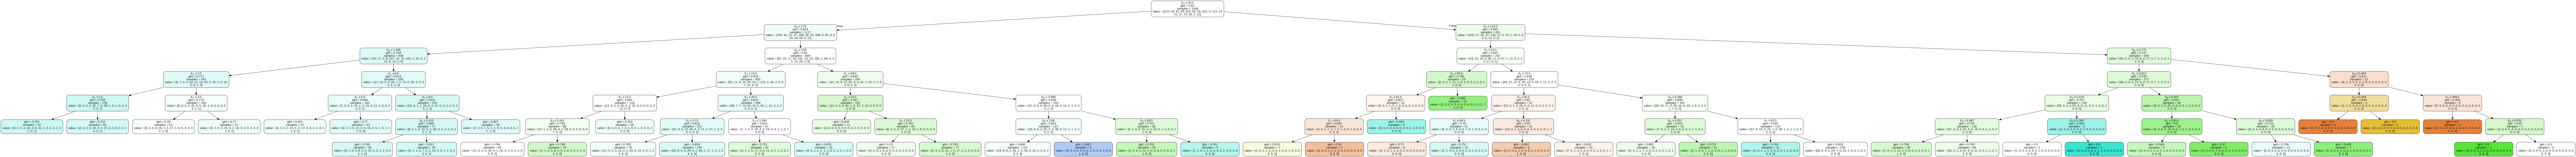

In [0]:
from IPython.display import Image  
import pydotplus 
import pydot
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz


dotfile = StringIO() 
export_graphviz(clf, out_file=dotfile,
                         filled=True, rounded=True,
                         special_characters=True)
                    
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
Image(graph.create_png())